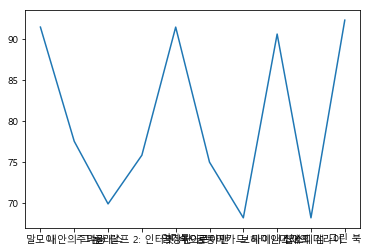

In [84]:
from bs4 import BeautifulSoup
import pandas as pd

import urllib.request
import urllib.parse

#참고 링크
# https://movie.daum.net/boxoffice/weekly?startDate=20190128
# https://movie.daum.net/boxoffice/weekly?startDate=20190204
sel_dates = ['20190114', '20190121', '20190128', '20190204']
movies = []
for i in range(len(sel_dates)):
    url = 'https://movie.daum.net/boxoffice/weekly?startDate=' + sel_dates[i]
    with urllib.request.urlopen(url) as response:
        html = response.read()
        soup = BeautifulSoup(html, 'html.parser')
    #soup
    # 제목, 평점 Parsing
    titles = soup.find_all("strong",{"class": "tit_join"})
    ratings = soup.find_all("span",{"class": "bg_star inner_star"})
    #print(len(titles), len(ratings)) # 행의 크기 (10개씩 정의됨)

    #titles[0].string # '극한직업'
    #ratings[0].get('style') # 'width:76.7%'
    #ratings[0].get('style').split(":") # ['width', '76.7%']
    #ratings[0].get('style').split(":")[1] # '76.7%'
    #ratings[0].get('style').split(":")[1].replace('%','') # '76.7'

    
    for i in range(len(titles)):
        title = titles[i].string
        rating = ratings[i].get('style').split(":")[1].replace('%','')
        movies.append([title, float("{0:.2f}".format(float(rating)))])


df = pd.DataFrame(movies, columns = ['title', 'rating'])
df2 = df.groupby('title')['rating'].mean()
df3 = df.reset_index()
df3
# 위의 다음 영화 사이트의 박스오피스 주간 기간의 영화 10건의 
# 평균 평점을 구하고 그래프로 출력하시오.

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib.pyplot as plt
x = list(df['title'].head(10))
y = list(df['rating'].head(10).astype(float))
plt.plot(x,y)
plt.show()